In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten,Dropout, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

In [4]:
x_train, x_test, y_train, y_test, x_val, y_val = data_extract()
timesteps = x_train.shape[1]
num_features = x_train.shape[2]

In [5]:
x_train.shape

(231, 3, 1)

# AutoEncoder

### CNN

In [ ]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, 10, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
autoencoder_mse = plot_predictions1(model,x_test, y_test)

In [18]:
autoencoder_mse

0.0387041677210959

### GRU

In [ ]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, 10, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
autoencoder_gru_mse = plot_predictions1(model,x_test, y_test)

In [42]:
autoencoder_gru_mse

1.3014438265610517

### LSTM

In [ ]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, 10, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [73]:
auto_lstm_mse

1.6606397983528207

### RNN

In [ ]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, 10, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [43]:
auto_rnn_mse

0.07499880435187749

# Moving Average with Encoder

In [21]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

### CNN

In [ ]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [57]:
mavg_auto_cnn_mse

0.40302425113882556

### RNN

In [ ]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [59]:
mavg_auto_rnn_mse

0.4907996666128383

### GRU

In [ ]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [61]:
mavg_auto_gru_mse

1.022695995825198

### LSTM

In [ ]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [68]:
mavg_auto_lstm_mse

2.3015907611799573

## AN Test

In [14]:
x_train.shape

(231, 3, 1)

In [15]:
timesteps = x_train.shape[1]
num_features = x_train.shape[2]

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

model = Sequential([
    LSTM(128,input_shape=(timesteps, num_features)),
    Dropout(0.2),
    RepeatVector(timesteps),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(num_features))
])

model.compile(loss='mae', optimizer= 'adam')

In [17]:
history = model.fit(x_train,y_train, 
          epochs =10, 
          batch_size = 32, 
          validation_split = 0.1, 
          shuffle= False)

Epoch 1/10
7/7 [==============================] - 4s 122ms/step - loss: 1.5762 - val_loss: 1.4353
Epoch 2/10
7/7 [==============================] - 0s 15ms/step - loss: 1.1546 - val_loss: 1.1061
Epoch 3/10
7/7 [==============================] - 0s 11ms/step - loss: 1.0806 - val_loss: 1.0090
Epoch 4/10
7/7 [==============================] - 0s 10ms/step - loss: 0.9972 - val_loss: 0.9940
Epoch 5/10
7/7 [==============================] - 0s 9ms/step - loss: 0.9454 - val_loss: 0.8992
Epoch 6/10
7/7 [==============================] - 0s 10ms/step - loss: 0.8939 - val_loss: 0.8377
Epoch 7/10
7/7 [==============================] - 0s 9ms/step - loss: 0.8496 - val_loss: 0.7829
Epoch 8/10
7/7 [==============================] - 0s 9ms/step - loss: 0.8097 - val_loss: 0.7361
Epoch 9/10
7/7 [==============================] - 0s 10ms/step - loss: 0.7911 - val_loss: 0.7151
Epoch 10/10
7/7 [==============================] - 0s 9ms/step - loss: 0.7805 - val_loss: 0.7042


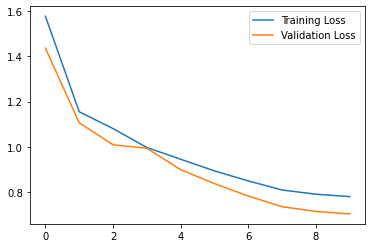

In [18]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label ='Validation Loss')
plt.savefig('loss.png')
plt.legend()

In [19]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.7945


0.7944866418838501

In [3]:
data = pd.read_csv("../data/LocationA.csv")
data

,Unnamed: 0,Date,TempA,pHA,ECA,DOA,BODA,TNA
0,0,12/15/2021,21.50,7.73,1748,2.55,27.96,1.28
1,1,12/16/2021,21.21,7.82,1765,2.60,27.90,1.08
2,2,12/17/2021,21.21,7.73,1769,2.59,27.88,1.17
3,3,12/18/2021,21.26,7.82,1776,2.63,27.66,1.15
4,4,12/19/2021,21.09,7.76,1822,2.60,27.71,1.22
...,...,...,...,...,...,...,...,...
360,360,12/10/2022,21.70,7.71,1642,2.45,27.90,1.28
361,361,12/11/2022,21.86,7.72,1640,2.42,28.19,1.29
362,362,12/12/2022,21.67,7.74,1650,2.43,28.12,1.31
363,363,12/13/2022,21.66,7.72,1645,2.43,27.89,1.27


In [4]:
data = data.drop(columns=["Unnamed: 0", "Date"])
data

,TempA,pHA,ECA,DOA,BODA,TNA
0,21.50,7.73,1748,2.55,27.96,1.28
1,21.21,7.82,1765,2.60,27.90,1.08
2,21.21,7.73,1769,2.59,27.88,1.17
3,21.26,7.82,1776,2.63,27.66,1.15
4,21.09,7.76,1822,2.60,27.71,1.22
...,...,...,...,...,...,...
360,21.70,7.71,1642,2.45,27.90,1.28
361,21.86,7.72,1640,2.42,28.19,1.29
362,21.67,7.74,1650,2.43,28.12,1.31
363,21.66,7.72,1645,2.43,27.89,1.27


In [5]:
target_column = "DOA"

In [13]:
X = []
y = []
for i in range(3, len(data)):
    features = data.iloc[i-3:i, :].drop(target_column, axis=1)  # Extract window of 3 features
    target = data.iloc[i, data.columns.get_loc(target_column)]  # Extract target value
    X.append(features.values.ravel())  # Flatten features
    y.append(target)

# Convert lists to numpy arrays
X = np.array(X_train)
y = np.array(y_train)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [16]:
x_train.shape

(231, 15)

In [17]:
y_train.shape

(231,)

In [19]:
xt = x_train.copy()

In [20]:
xt = xt.reshape(231,15,1)
xt.shape

(231, 15, 1)

In [41]:
xt[1], y_train[1]

(array([[  23.23],
        [   7.53],
        [1182.  ],
        [  29.52],
        [   1.49],
        [  23.7 ],
        [   7.56],
        [1338.  ],
        [  29.6 ],
        [   1.47],
        [  23.11],
        [   7.56],
        [1347.  ],
        [  29.59],
        [   1.39]]),
 2.17)

In [ ]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
#model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, 100, xt, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, xt, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
autoencoder_mse = plot_predictions1(model,x_test, y_test)

In [35]:
autoencoder_mse

9.048035876644462

In [ ]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('combine_gru/', save_best_only=True)
model = fit_model(model, cp, 10, xt, y_train,x_val, y_val)

plot_train("combine_gru", 50, xt, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

In [38]:
gru_mse

0.9794993820954397

In [42]:
window_size = 2

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=xt)
target = y_train[window_size - 1:].flatten()

In [46]:
moving_avg_data.shape

(230, 15, 1)

In [48]:
xt[1]

array([[  23.23],
       [   7.53],
       [1182.  ],
       [  29.52],
       [   1.49],
       [  23.7 ],
       [   7.56],
       [1338.  ],
       [  29.6 ],
       [   1.47],
       [  23.11],
       [   7.56],
       [1347.  ],
       [  29.59],
       [   1.39]])

In [47]:
moving_avg_data[1]

array([[  24.545],
       [   7.585],
       [1491.   ],
       [  30.94 ],
       [   1.76 ],
       [  25.05 ],
       [   7.76 ],
       [1573.   ],
       [  30.915],
       [   1.75 ],
       [  24.955],
       [   7.44 ],
       [1580.   ],
       [  30.995],
       [   1.72 ]])

In [45]:
target[0]

2.17

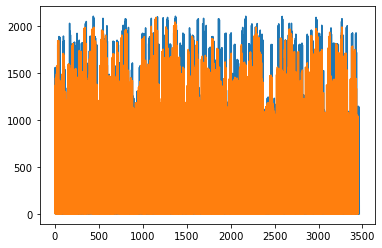

In [54]:
plt.plot(xt.flatten())
plt.plot(moving_avg_data.flatten())

In [72]:
features = data.drop(target_column, axis=1)
target = data[target_column]

In [76]:
features.head(), target.head()

(   TempA   pHA   ECA   BODA   TNA
 0  21.50  7.73  1748  27.96  1.28
 1  21.21  7.82  1765  27.90  1.08
 2  21.21  7.73  1769  27.88  1.17
 3  21.26  7.82  1776  27.66  1.15
 4  21.09  7.76  1822  27.71  1.22,
 0    2.55
 1    2.60
 2    2.59
 3    2.63
 4    2.60
 Name: DOA, dtype: float64)

In [77]:
X = []
y = []
for i in range(3, len(features)):
    X.append(features.iloc[i-3:i, :].values.ravel())  # Flatten features
    y.append(target.iloc[i])

X = np.array(X)
y = np.array(y)

In [83]:
X[0], X[1]

(array([2.150e+01, 7.730e+00, 1.748e+03, 2.796e+01, 1.280e+00, 2.121e+01,
        7.820e+00, 1.765e+03, 2.790e+01, 1.080e+00, 2.121e+01, 7.730e+00,
        1.769e+03, 2.788e+01, 1.170e+00]),
 array([2.121e+01, 7.820e+00, 1.765e+03, 2.790e+01, 1.080e+00, 2.121e+01,
        7.730e+00, 1.769e+03, 2.788e+01, 1.170e+00, 2.126e+01, 7.820e+00,
        1.776e+03, 2.766e+01, 1.150e+00]))

In [80]:
features.head()

,TempA,pHA,ECA,BODA,TNA
0,21.50,7.73,1748,27.96,1.28
1,21.21,7.82,1765,27.90,1.08
2,21.21,7.73,1769,27.88,1.17
3,21.26,7.82,1776,27.66,1.15
4,21.09,7.76,1822,27.71,1.22


In [82]:
X.shape, y.shape

((362, 15), (362,))

In [84]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [88]:
x_train.shape

(231, 15)

In [89]:
xt = x_train.copy()
xt = xt.reshape(231,15,1)
xt.shape

(231, 15, 1)

Epoch 1/10
7/8 [=========================>....] - ETA: 0s - loss: 3.6748 - root_mean_squared_error: 1.9170 

INFO:tensorflow:Assets written to: combine_gru/assets


INFO:tensorflow:Assets written to: combine_gru/assets


8/8 [==============================] - 5s 437ms/step - loss: 3.6447 - root_mean_squared_error: 1.9091 - val_loss: 2.8367 - val_root_mean_squared_error: 1.6843
Epoch 2/10
6/8 [=====================>........] - ETA: 0s - loss: 2.9716 - root_mean_squared_error: 1.7238

INFO:tensorflow:Assets written to: combine_gru/assets


INFO:tensorflow:Assets written to: combine_gru/assets


8/8 [==============================] - 3s 446ms/step - loss: 2.9930 - root_mean_squared_error: 1.7300 - val_loss: 2.3079 - val_root_mean_squared_error: 1.5192
Epoch 3/10
7/8 [=========================>....] - ETA: 0s - loss: 2.4569 - root_mean_squared_error: 1.5675

INFO:tensorflow:Assets written to: combine_gru/assets


INFO:tensorflow:Assets written to: combine_gru/assets


8/8 [==============================] - 2s 337ms/step - loss: 2.4479 - root_mean_squared_error: 1.5646 - val_loss: 1.8794 - val_root_mean_squared_error: 1.3709
Epoch 4/10
7/8 [=========================>....] - ETA: 0s - loss: 2.0053 - root_mean_squared_error: 1.4161

INFO:tensorflow:Assets written to: combine_gru/assets


INFO:tensorflow:Assets written to: combine_gru/assets


8/8 [==============================] - 2s 333ms/step - loss: 2.0077 - root_mean_squared_error: 1.4169 - val_loss: 1.5472 - val_root_mean_squared_error: 1.2438
Epoch 5/10
7/8 [=========================>....] - ETA: 0s - loss: 1.6605 - root_mean_squared_error: 1.2886

INFO:tensorflow:Assets written to: combine_gru/assets


INFO:tensorflow:Assets written to: combine_gru/assets


8/8 [==============================] - 2s 341ms/step - loss: 1.6641 - root_mean_squared_error: 1.2900 - val_loss: 1.2915 - val_root_mean_squared_error: 1.1364
Epoch 6/10
7/8 [=========================>....] - ETA: 0s - loss: 1.3909 - root_mean_squared_error: 1.1794

INFO:tensorflow:Assets written to: combine_gru/assets


INFO:tensorflow:Assets written to: combine_gru/assets


8/8 [==============================] - 2s 351ms/step - loss: 1.3910 - root_mean_squared_error: 1.1794 - val_loss: 1.1083 - val_root_mean_squared_error: 1.0527
Epoch 7/10
7/8 [=========================>....] - ETA: 0s - loss: 1.1876 - root_mean_squared_error: 1.0898

INFO:tensorflow:Assets written to: combine_gru/assets


INFO:tensorflow:Assets written to: combine_gru/assets


8/8 [==============================] - 2s 344ms/step - loss: 1.1888 - root_mean_squared_error: 1.0903 - val_loss: 0.9877 - val_root_mean_squared_error: 0.9938
Epoch 8/10
7/8 [=========================>....] - ETA: 0s - loss: 1.0479 - root_mean_squared_error: 1.0236

INFO:tensorflow:Assets written to: combine_gru/assets


INFO:tensorflow:Assets written to: combine_gru/assets


8/8 [==============================] - 3s 478ms/step - loss: 1.0554 - root_mean_squared_error: 1.0273 - val_loss: 0.9079 - val_root_mean_squared_error: 0.9529
Epoch 9/10
7/8 [=========================>....] - ETA: 0s - loss: 0.9600 - root_mean_squared_error: 0.9798

INFO:tensorflow:Assets written to: combine_gru/assets


INFO:tensorflow:Assets written to: combine_gru/assets


8/8 [==============================] - 2s 343ms/step - loss: 0.9562 - root_mean_squared_error: 0.9779 - val_loss: 0.8655 - val_root_mean_squared_error: 0.9303
Epoch 10/10
6/8 [=====================>........] - ETA: 0s - loss: 0.9124 - root_mean_squared_error: 0.9552

INFO:tensorflow:Assets written to: combine_gru/assets


INFO:tensorflow:Assets written to: combine_gru/assets


8/8 [==============================] - 0s 3ms/step


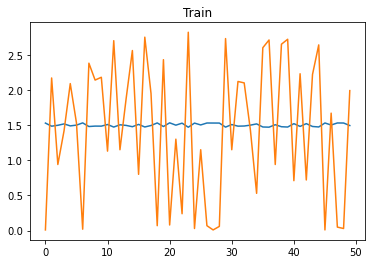

2/2 [==============================] - 0s 4ms/step


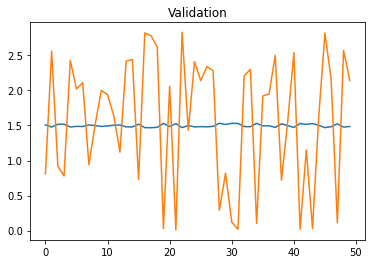

3/3 [==============================] - 0s 4ms/step


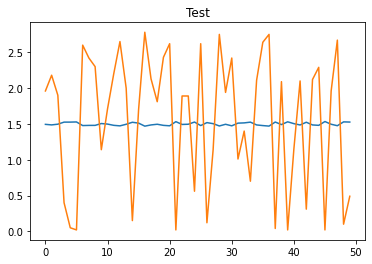

3/3 [==============================] - 0s 4ms/step


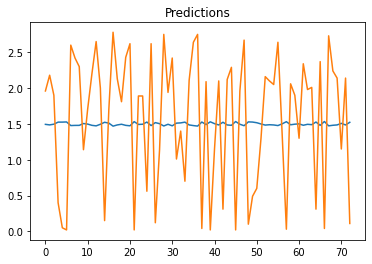

In [90]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('combine_gru/', save_best_only=True)
model = fit_model(model, cp, 10, xt, y_train,x_val, y_val)

plot_train("combine_gru", 50, xt, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

In [91]:
gru_mse

0.8777801141411348